<a href="https://colab.research.google.com/github/chipojaya1/myNEBDHub/blob/main/Japan_Case_Milestone__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='crimson'>**Milestone #2 - Applying Analytical Strategies**</font>

### Getting Started

In [1]:
# Loading necessary libraries for time series analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set_style('darkgrid')

import warnings
warnings.simplefilter("ignore")

In [2]:
# Getting started
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Time Series Analysis**

In [5]:
# Load datframe as jp
df_jp = pd.read_csv('/content/drive/MyDrive/Analyzing_Pandemic_Responses/data/df_clean.csv')
df_jp.head()

,CountryName,CountryCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,C3M_Cancel public events,C3M_Flag,...,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,DailyCases,DailyDeaths,Cases_7dayAvg,Deaths_7dayAvg
0,Japan,JPN,NAT_TOTAL,2020-01-01,0.0,False,0.0,False,0.0,False,...,NV,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,Japan,JPN,NAT_TOTAL,2020-01-02,0.0,False,0.0,False,0.0,False,...,NV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Japan,JPN,NAT_TOTAL,2020-01-03,0.0,False,0.0,False,0.0,False,...,NV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Japan,JPN,NAT_TOTAL,2020-01-04,0.0,False,0.0,False,0.0,False,...,NV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Japan,JPN,NAT_TOTAL,2020-01-05,0.0,False,0.0,False,0.0,False,...,NV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Data Prep**

In [6]:
# Set the 'Date' column as the index
df_jp['Date'] = pd.to_datetime(df_jp['Date'])
df_jp = df_jp.set_index('Date')

wk = pd.DataFrame({
    'weekly_cases': df_jp['DailyCases'].resample('W-SUN').sum(),
    'stringency_wk': df_jp['StringencyIndex_Average'].resample('W-SUN').mean()
}).dropna()

# optional smoothing target for plotting
wk['cases_7w'] = wk['weekly_cases'].rolling(3, min_periods=1).mean()
wk = wk.asfreq('W-SUN')  # ensure frequency is set

**STL decomposition**

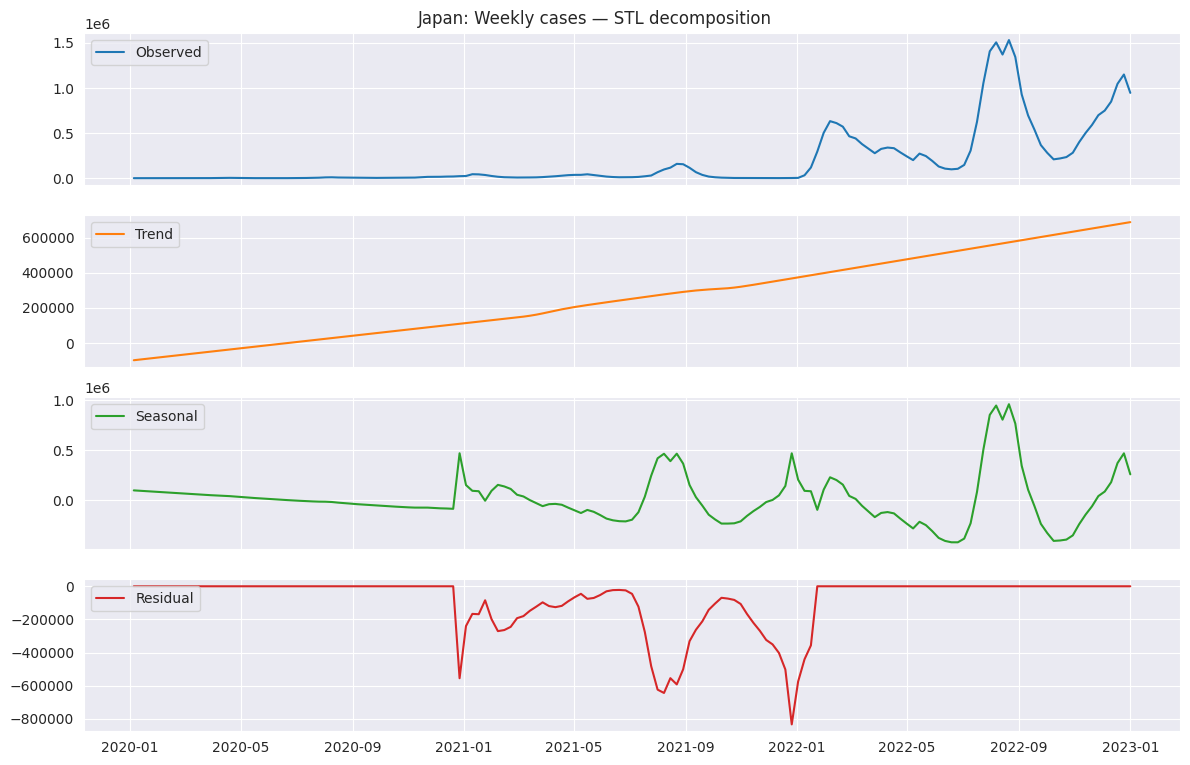

In [7]:
from statsmodels.tsa.seasonal import STL

y = wk['weekly_cases'].astype(float).fillna(0.0)
stl = STL(y, period=52, robust=True)  # weekly data → ~52 periods per year
res = stl.fit()

fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
axes[0].plot(wk.index, res.observed, label='Observed'); axes[0].legend(loc='upper left')
axes[1].plot(wk.index, res.trend, color='C1', label='Trend'); axes[1].legend(loc='upper left')
axes[2].plot(wk.index, res.seasonal, color='C2', label='Seasonal'); axes[2].legend(loc='upper left')
axes[3].plot(wk.index, res.resid, color='C3', label='Residual'); axes[3].legend(loc='upper left')
plt.suptitle('Japan: Weekly cases — STL decomposition', y=0.95)
plt.tight_layout()
plt.show()


#### **Machine Learning**